# Betweenness Centrality

Based on: https://github.com/gboeing/osmnx-examples/blob/main/notebooks/06-stats-indicators-centrality.ipynb

Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph. It is often used to find nodes that serve as a bridge from one part of a graph to another. The algorithm calculates shortest paths between all pairs of nodes in a graph.

In [10]:
import networkx as nx
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# get the street network for a place
place = '7th district, Budapest, Hungary'
G = ox.graph_from_place(place, network_type = 'drive')

## Inspect Betweenness Centrality

In [7]:
# calculate betweenness with a digraph of G (ie no parallel edges)
bc = nx.betweenness_centrality(ox.get_digraph(G), weight = 'length')
max_node, max_bc = max(bc.items(), key = lambda x: x[1])
max_node, max_bc

(35500863, 0.17106530937120354)

In the 7th district of Budapest, Hungary, the node with the highest betweenness centrality has ~17% of all shortest paths running through it. Let's highlight it in the plot:

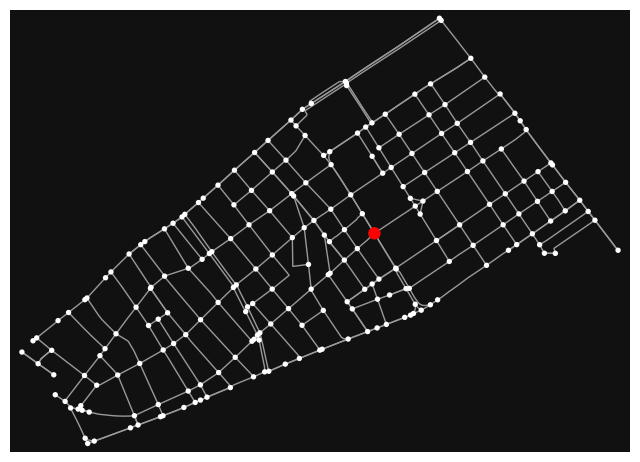

In [8]:
nc = ['r' if node == max_node else 'w' for node in G.nodes]
ns = [80 if node == max_node else 15 for node in G.nodes]
fig, ax = ox.plot_graph(G, node_size = ns, node_color = nc, node_zorder = 2)

~17% of all shortest paths run through the node highlighted in red. Let's look at the relative betweenness centrality of every node in the graph:

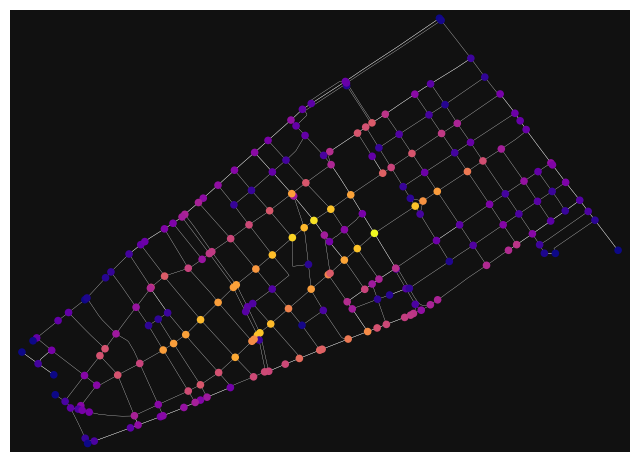

In [12]:
# add the betweenness centrality values as new node attributes, then plot
nx.set_node_attributes(G, bc, 'bc')
nc = ox.plot.get_node_colors_by_attr(G, 'bc', cmap = 'plasma')
fig, ax = ox.plot_graph(G,
                        show = False,
                        close = False,
                        node_color = nc,
                        node_size = 30,
                        node_zorder = 2,
                        edge_linewidth = 0.2,
                        edge_color = 'w')

fig.savefig('images/betweenness_centrality.png', dpi = 100, bbox_inches = 'tight')
plt.show()

Above, the nodes are visualized by betweenness centrality, from low (dark violet) to high (light yellow). The colors in the colorspace are linearly mapped to the attribute values.